# **Business Understanding**


**Context:**
The dataset provides insights into various tracks, spanning multiple years and captures their musical attributes and popularity.

**Objectives:**

Musical Trends Analysis: Examine how musical attributes (like BPM, energy, danceability, etc.) have evolved over the years.

Genre Popularity: Understand which genres have been most popular and how their popularity has changed over time.

Artist Analysis: Identify top artists based on track popularity and understand the musical attributes of their tracks.

Track Popularity Predictors: Investigate which musical attributes most influence a track's popularity.


# **Data Understanding**

In [2]:
import pandas as pd

# Load the dataset
spotify_data = pd.read_csv('https://raw.githubusercontent.com/neeharikasinghsjsu/cmpe255assignments/main/DataPreparationAssignment/datasets/Spotify_2000.csv')

# Display the first few rows to get a sense of the data
spotify_data.head()


,Index,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
0,1,Sunrise,Norah Jones,adult standards,2004,157,30,53,-14,11,68,201,94,3,71
1,2,Black Night,Deep Purple,album rock,2000,135,79,50,-11,17,81,207,17,7,39
2,3,Clint Eastwood,Gorillaz,alternative hip hop,2001,168,69,66,-9,7,52,341,2,17,69
3,4,The Pretender,Foo Fighters,alternative metal,2007,173,96,43,-4,3,37,269,0,4,76
4,5,Waitin' On A Sunny Day,Bruce Springsteen,classic rock,2002,106,82,58,-5,10,87,256,1,3,59


In [3]:
# Get the shape of the dataset
data_shape = spotify_data.shape

# Get the data types of each column
data_types = spotify_data.dtypes

data_shape, data_types


((1994, 15),
 Index                      int64
 Title                     object
 Artist                    object
 Top Genre                 object
 Year                       int64
 Beats Per Minute (BPM)     int64
 Energy                     int64
 Danceability               int64
 Loudness (dB)              int64
 Liveness                   int64
 Valence                    int64
 Length (Duration)         object
 Acousticness               int64
 Speechiness                int64
 Popularity                 int64
 dtype: object)

In [4]:
# Check for missing values in the dataset
missing_values = spotify_data.isnull().sum()

missing_values


Index                     0
Title                     0
Artist                    0
Top Genre                 0
Year                      0
Beats Per Minute (BPM)    0
Energy                    0
Danceability              0
Loudness (dB)             0
Liveness                  0
Valence                   0
Length (Duration)         0
Acousticness              0
Speechiness               0
Popularity                0
dtype: int64

In [5]:
# Check unique values of the "Length (Duration)" column
unique_durations = spotify_data["Length (Duration)"].unique()

unique_durations[:10]  # Displaying the first 10 unique values for brevity


array(['201', '207', '341', '269', '256', '247', '257', '366', '223',
       '290'], dtype=object)

In [6]:
# Replace commas in "Length (Duration)" and convert to integer
spotify_data["Length (Duration)"] = spotify_data["Length (Duration)"].str.replace(',', '').astype(int)

# Get basic statistics for the numerical columns
numerical_statistics = spotify_data.describe()

numerical_statistics


,Index,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
count,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.00000
mean,997.500000,1992.992979,120.215647,59.679539,53.238215,-9.008526,19.012036,49.408726,262.443330,28.858074,4.994985,59.52658
std,575.762538,16.116048,28.028096,22.154322,15.351507,3.647876,16.727378,24.858212,93.604387,29.011986,4.401566,14.35160
min,1.000000,1956.000000,37.000000,3.000000,10.000000,-27.000000,2.000000,3.000000,93.000000,0.000000,2.000000,11.00000
25%,499.250000,1979.000000,99.000000,42.000000,43.000000,-11.000000,9.000000,29.000000,212.000000,3.000000,3.000000,49.25000
50%,997.500000,1993.000000,119.000000,61.000000,53.000000,-8.000000,12.000000,47.000000,245.000000,18.000000,4.000000,62.00000
75%,1495.750000,2007.000000,136.000000,78.000000,64.000000,-6.000000,23.000000,69.750000,289.000000,50.000000,5.000000,71.00000
max,1994.000000,2019.000000,206.000000,100.000000,96.000000,-2.000000,99.000000,99.000000,1412.000000,99.000000,55.000000,100.00000


In [7]:
# Explore the distribution of the "Top Genre" column
genre_distribution = spotify_data["Top Genre"].value_counts()

# Display the top 10 genres for brevity
genre_distribution.head(10)


album rock           413
adult standards      123
dutch pop             88
alternative rock      86
dance pop             83
dutch indie           75
alternative metal     70
dance rock            52
classic rock          51
dutch cabaret         51
Name: Top Genre, dtype: int64

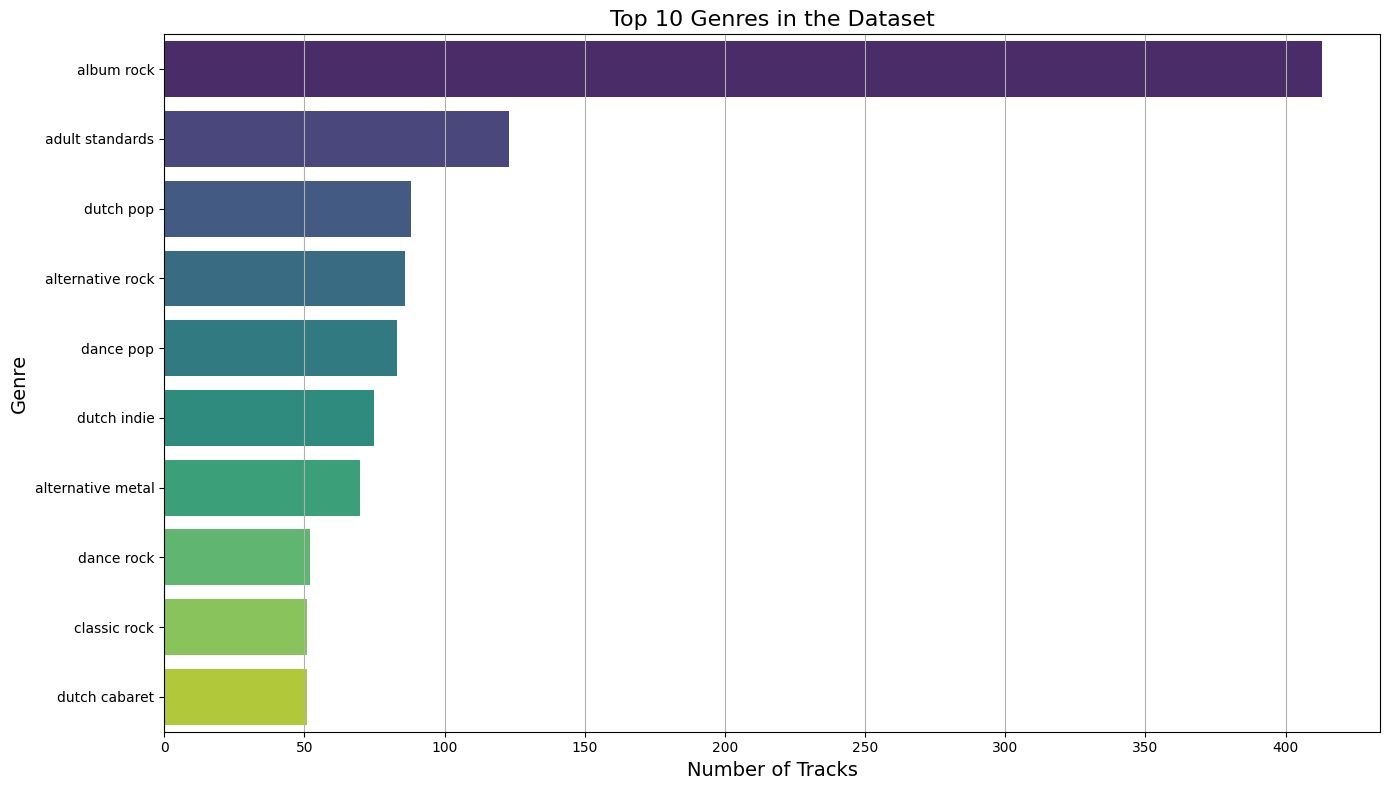

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the plot
plt.figure(figsize=(14, 8))
sns.barplot(x=genre_distribution.head(10).values, y=genre_distribution.head(10).index, palette="viridis")

# Title and labels
plt.title("Top 10 Genres in the Dataset", fontsize=16)
plt.xlabel("Number of Tracks", fontsize=14)
plt.ylabel("Genre", fontsize=14)
plt.grid(axis="x")

# Display the plot
plt.tight_layout()
plt.show()


In [9]:
# Explore the distribution of the "Artist" column
artist_distribution = spotify_data["Artist"].value_counts()

# Display the top 10 artists for brevity
artist_distribution.head(10)


Queen                 37
The Beatles           36
Coldplay              27
U2                    26
The Rolling Stones    24
Bruce Springsteen     23
Michael Jackson       23
ABBA                  22
David Bowie           21
Fleetwood Mac         18
Name: Artist, dtype: int64

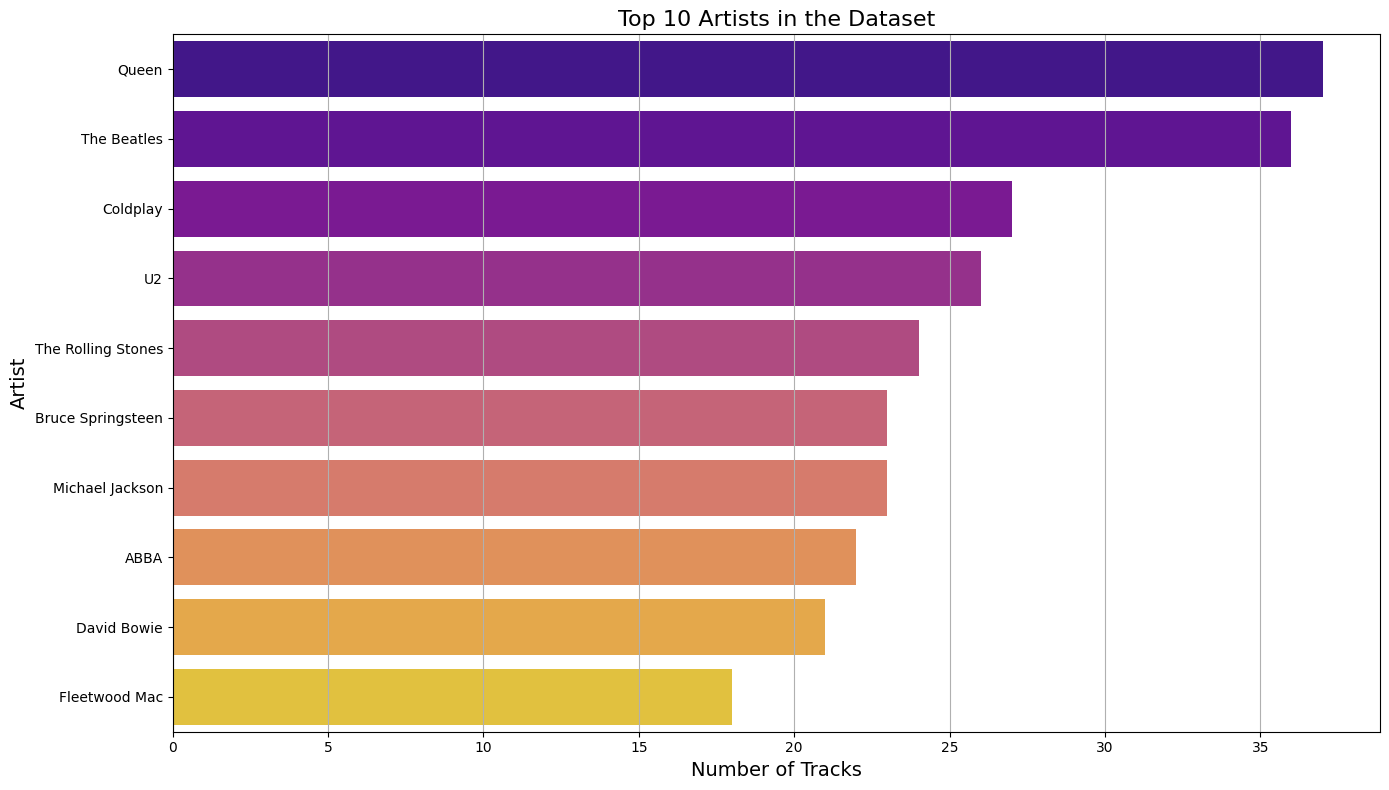

In [10]:
# Set up the plot for top artists
plt.figure(figsize=(14, 8))
sns.barplot(x=artist_distribution.head(10).values, y=artist_distribution.head(10).index, palette="plasma")

# Title and labels
plt.title("Top 10 Artists in the Dataset", fontsize=16)
plt.xlabel("Number of Tracks", fontsize=14)
plt.ylabel("Artist", fontsize=14)
plt.grid(axis="x")

# Display the plot
plt.tight_layout()
plt.show()


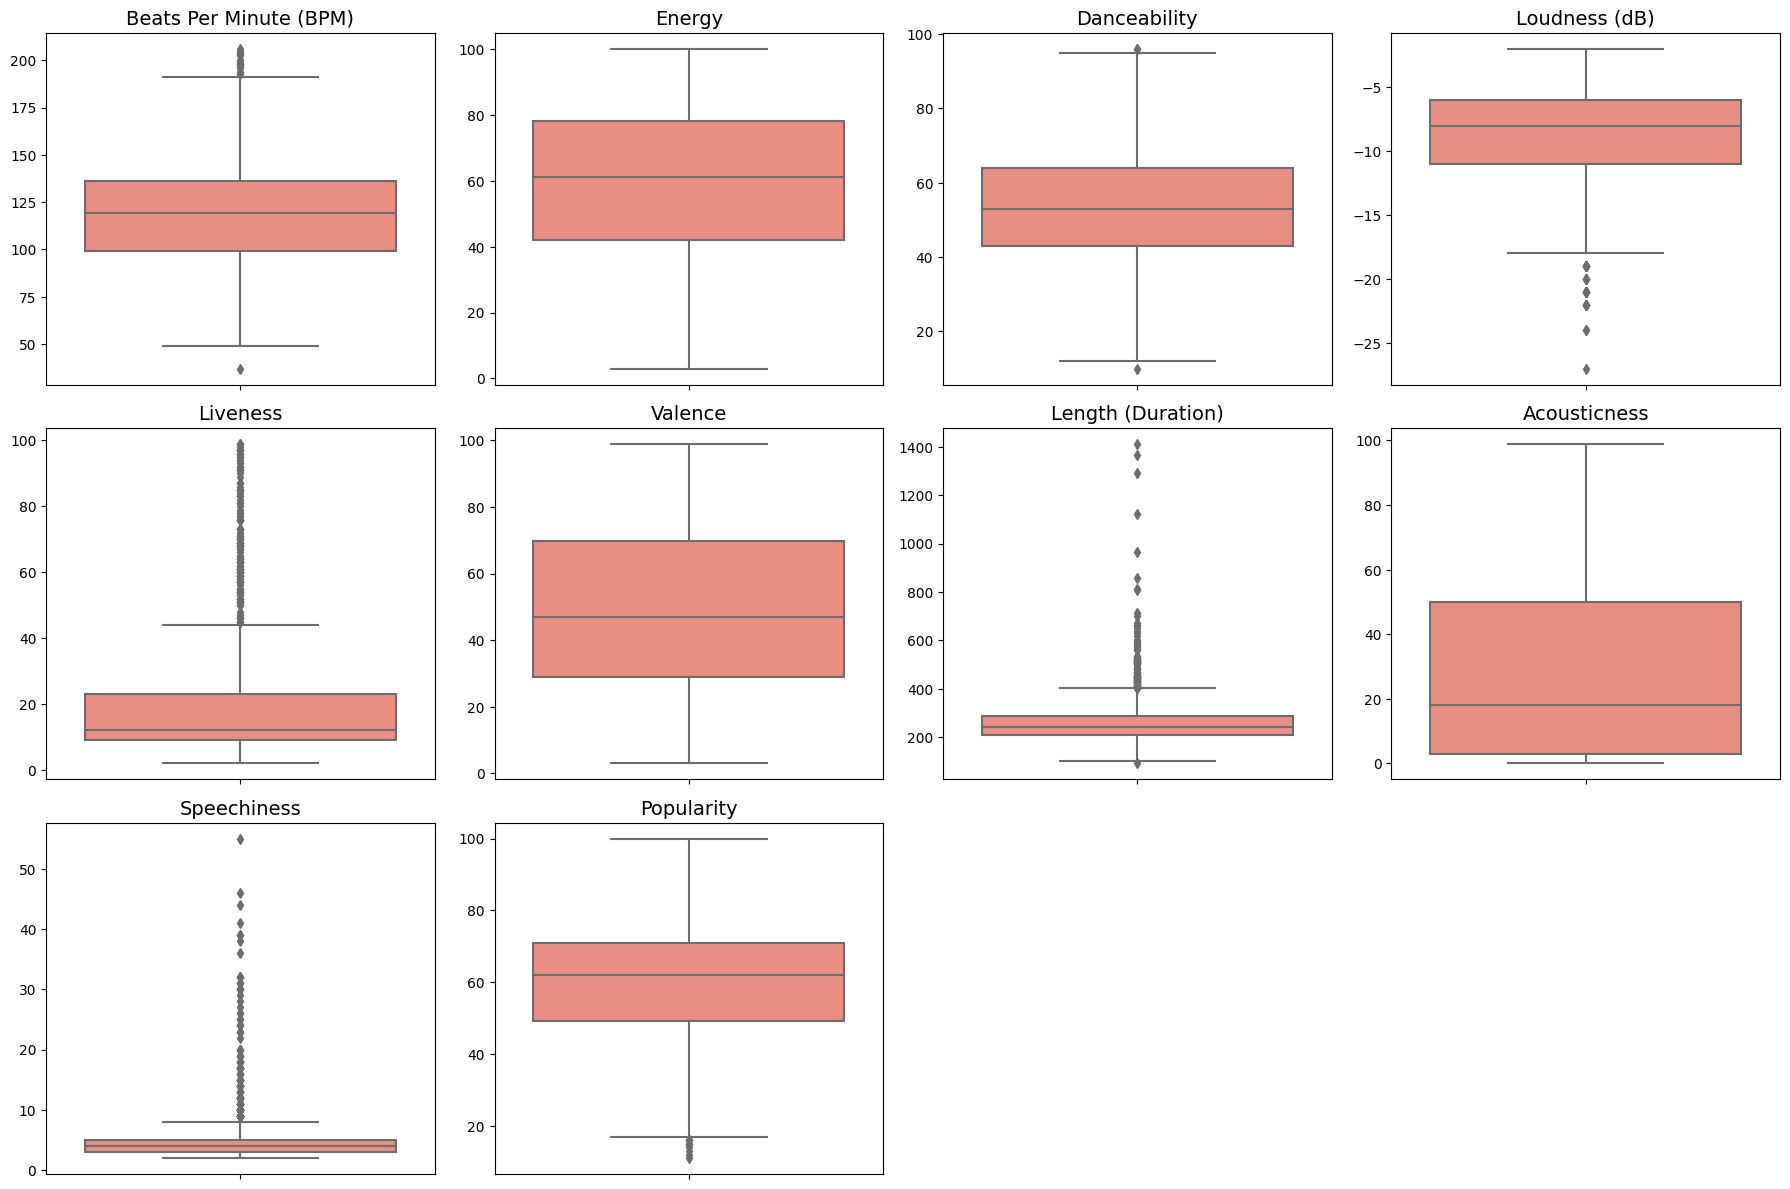

In [11]:
# Set up the plots for boxplots
plt.figure(figsize=(18, 12))

# List of columns to visualize
columns_to_plot = ["Beats Per Minute (BPM)", "Energy", "Danceability", "Loudness (dB)", "Liveness",
                   "Valence", "Length (Duration)", "Acousticness", "Speechiness", "Popularity"]

# Create boxplots for each column
for i, col in enumerate(columns_to_plot, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(y=spotify_data[col], color="salmon")
    plt.title(col, fontsize=14)
    plt.ylabel('')

# Adjust layout
plt.tight_layout()
plt.show()


Here are the boxplots for the selected columns:

Beats Per Minute (BPM): A few tracks have BPM values that are notably higher or lower than the majority.

Energy: The data seems to be fairly spread out, but there are a few tracks with particularly low energy levels.

Danceability: Most of the tracks cluster around the median, with a few outliers on the lower end.

Loudness (dB): There are tracks with notably lower loudness levels, which can be considered outliers.

Liveness: Several tracks have high liveness values, suggesting they might be live recordings or have audience sounds.

Valence: The distribution is widespread, but there aren't any clear outliers.

Length (Duration): A few tracks have notably long durations, which stand out from the rest.

Acousticness: Many tracks have high acousticness values, indicating a significant presence of acoustic tracks in the dataset.

Speechiness: A few tracks have higher speechiness values, suggesting they might be more spoken-word than musical.

Popularity: The data is fairly concentrated, with no clear outliers.

# **Data Preparation**

**Feature Engineering**

In [12]:
# Feature Engineering: Creating 'Decade' feature
spotify_data['Decade'] = (10 * (spotify_data['Year'] // 10)).astype(str) + 's'

# Feature Engineering: Creating 'Loudness Level' feature based on Loudness (dB)
bins = [-30, -10, -5, 0]
labels = ['Low', 'Medium', 'High']
spotify_data['Loudness Level'] = pd.cut(spotify_data['Loudness (dB)'], bins=bins, labels=labels, right=True)

# Display the first few rows to check the new features
spotify_data[['Year', 'Decade', 'Loudness (dB)', 'Loudness Level']].head()


,Year,Decade,Loudness (dB),Loudness Level
0,2004,2000s,-14,Low
1,2000,2000s,-11,Low
2,2001,2000s,-9,Medium
3,2007,2000s,-4,High
4,2002,2000s,-5,Medium


We've created two new features:

Decade: This categorizes each track based on the decade of its release (e.g., "2000s").

Loudness Level: This categorizes each track's loudness into "Low", "Medium", or "High" based on its decibel value.


**Data Encoding**

In [13]:
# Apply One-Hot Encoding to "Decade" and "Loudness Level" columns
encoded_data = pd.get_dummies(spotify_data, columns=["Decade", "Loudness Level"], drop_first=True)

# Display the first few rows to check the encoded columns
encoded_data.head()


,Index,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,...,Speechiness,Popularity,Decade_1960s,Decade_1970s,Decade_1980s,Decade_1990s,Decade_2000s,Decade_2010s,Loudness Level_Medium,Loudness Level_High
0,1,Sunrise,Norah Jones,adult standards,2004,157,30,53,-14,11,...,3,71,0,0,0,0,1,0,0,0
1,2,Black Night,Deep Purple,album rock,2000,135,79,50,-11,17,...,7,39,0,0,0,0,1,0,0,0
2,3,Clint Eastwood,Gorillaz,alternative hip hop,2001,168,69,66,-9,7,...,17,69,0,0,0,0,1,0,1,0
3,4,The Pretender,Foo Fighters,alternative metal,2007,173,96,43,-4,3,...,4,76,0,0,0,0,1,0,0,1
4,5,Waitin' On A Sunny Day,Bruce Springsteen,classic rock,2002,106,82,58,-5,10,...,3,59,0,0,0,0,1,0,1,0


**For "Decade":**

Decade_1960s, Decade_1970s, Decade_1980s, Decade_1990s, Decade_2000s, and Decade_2010s are the new columns.
Each of these columns will have a binary value (0 or 1) indicating the decade of the track.

**For "Loudness Level":**


Loudness Level_Medium and Loudness Level_High are the new columns.

Again, these columns have binary values (0 or 1) indicating the loudness level of the track. Since we used drop_first=True during encoding, the "Low" level serves as the reference category and doesn't get a separate column.

# **Modeling**

In [14]:
from sklearn.model_selection import train_test_split

# Define the features and the target variable
X = encoded_data.drop(columns=['Index', 'Title', 'Artist', 'Top Genre', 'Year', 'Popularity'])
y = encoded_data['Popularity']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape


((1595, 17), (399, 17))

The data has been successfully split:

Training set: 1,595 samples

Testing set: 399 samples


In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the Linear Regression model
lr_model = LinearRegression()

# Train the model using the training data
lr_model.fit(X_train, y_train)

# Predict the Popularity on the testing set
y_pred = lr_model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2


(188.0459551241976, 0.12462002226477431)

The linear regression model's performance on the testing set is as follows:

Mean Squared Error (MSE):
188.05 - This metric represents the average squared difference between the observed actual outcomes and the outcomes predicted by the model. Lower values are better.

R-squared :
0.1246 - This metric indicates the proportion of the variance in the dependent variable (Popularity) that is predictable from the independent variables (features). It ranges from 0 to 1, with 1 indicating perfect predictions and 0 indicating that the model does no better than simply predicting the mean of the target variable.


In [16]:
# Get the coefficients from the model
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lr_model.coef_
})

# Sort the coefficients by their absolute values in descending order
coefficients = coefficients.sort_values(by='Coefficient', key=abs, ascending=False)

coefficients


,Feature,Coefficient
14,Decade_2010s,-14.458252
13,Decade_2000s,-13.202428
12,Decade_1990s,-9.341319
11,Decade_1980s,-8.331755
16,Loudness Level_High,5.323754
10,Decade_1970s,-5.029256
9,Decade_1960s,-3.098933
3,Loudness (dB),1.142758
8,Speechiness,0.318828
2,Danceability,0.154465


In [17]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Initialize the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the Random Forest model using the training data
rf_model.fit(X_train, y_train)

# Predict the Popularity on the testing set using Random Forest
rf_y_pred = rf_model.predict(X_test)

# Evaluate the Random Forest model's performance
rf_mse = mean_squared_error(y_test, rf_y_pred)
rf_r2 = r2_score(y_test, rf_y_pred)

rf_mse, rf_r2


(190.8814102756892, 0.11142058563906976)

The Random Forest model's performance on the testing set is as follows:

Mean Squared Error (MSE):
190.88

R-squared
0.1114

In [18]:
# Initialize the Gradient Boosting model
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Train the Gradient Boosting model using the training data
gb_model.fit(X_train, y_train)

# Predict the Popularity on the testing set using Gradient Boosting
gb_y_pred = gb_model.predict(X_test)

# Evaluate the Gradient Boosting model's performance
gb_mse = mean_squared_error(y_test, gb_y_pred)
gb_r2 = r2_score(y_test, gb_y_pred)

gb_mse, gb_r2


(191.39476685301835, 0.10903083963822746)

The Gradient Boosting model's performance on the testing set is as follows:

Mean Squared Error (MSE):
191.39

R-squared
0.1090